# Equipo: 10
Grupo: 002 Miércoles

### Integrantes
- 1864878 Cerda Serrato Alan René
- 1867341 Cruz Lerma Jorge Antonio
- 1941475 Galindo Vázquez Jesús Alfonso
- 1630606 Valencia González Jesús Eduardo

# 1.- Base de Datos: Datos históricos del Bitcoin

**(Titulo Alternativo)**

> A) Historical Bitcoin Data

> B) https://www.kaggle.com/umeshkumar017/historical-bitcoin-data?select=Bitcoin+Historical+Data+-+In+Rupees.csv

## Información estadística básica
Importamos las librerías necesarias

In [224]:
import pandas as pd

Importamos y visualizamos los datos a usar

In [225]:
df = pd.read_csv("/content/Bitcoin Historical Data - In Rupees.csv")
df.head(3)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 24, 2021","48,846.3","49,532.5","49,847.4","48,812.4",59.89K,-1.40%
1,"Aug 23, 2021","49,539.7","49,255.4","50,498.8","49,038.6",75.37K,0.58%
2,"Aug 22, 2021","49,254.5","48,870.4","49,480.3","48,151.0",49.32K,0.77%


Acomodamos los datos para poder usarlos correctamente (Quitamos lo que no son números)

In [226]:
#Fuente: https://www.kaggle.com/anseldsouza/bitcoin-price-prediction-using-lstm

# Preparar los datos
df["Price"] = df["Price"].replace(",", "", regex = True)
df["Open"] = df["Open"].replace(",", "", regex = True)
df["High"] = df["High"].replace(",", "", regex = True)
df["Low"] = df["Low"].replace(",", "", regex = True)

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
df['Vol.'] = df['Vol.'].apply(value_to_float)

df["Change %"] = df["Change %"].replace("%", "", regex = True)

# A flotantes
df["Price"] = pd.to_numeric(df["Price"], downcast="float")
df["Open"] = pd.to_numeric(df["Open"], downcast="float")
df["High"] = pd.to_numeric(df["High"], downcast="float")
df["Low"] = pd.to_numeric(df["Low"], downcast="float")
df["Vol."] = pd.to_numeric(df["Vol."], downcast="float")
df["Change %"] = pd.to_numeric(df["Change %"], downcast="float")

df.head(3)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 24, 2021",48846.300781,49532.500000,49847.398438,48812.398438,59890.0,-1.40
1,"Aug 23, 2021",49539.699219,49255.398438,50498.800781,49038.601562,75370.0,0.58
2,"Aug 22, 2021",49254.500000,48870.398438,49480.300781,48151.000000,49320.0,0.77


Ahora que los datos están listos, procedemos a la Información estadística básica.

(No se usó la columna "Date" porque son fechas)

- Suma de elementos de las columnas

In [227]:
for i in range(1, len(df.columns)):
  print("La suma de los elementos de la columna ", df.columns[i], " es ", df[df.columns[i]].sum())

La suma de los elementos de la columna  Price  es  21991338.0
La suma de los elementos de la columna  Open  es  21942602.0
La suma de los elementos de la columna  High  es  22614142.0
La suma de los elementos de la columna  Low  es  21202066.0
La suma de los elementos de la columna  Vol.  es  1187446000.0
La suma de los elementos de la columna  Change %  es  2003.52


- Promedio de las columnas

In [228]:
for i in range(1, len(df.columns)):
  print("El promedio de los elementos de la columna ", df.columns[i], " es ", df[df.columns[i]].mean())

El promedio de los elementos de la columna  Price  es  5421.90185546875
El promedio de los elementos de la columna  Open  es  5409.88330078125
El promedio de los elementos de la columna  High  es  5575.44921875
El promedio de los elementos de la columna  Low  es  5227.3056640625
El promedio de los elementos de la columna  Vol.  es  292762.90625
El promedio de los elementos de la columna  Change %  es  0.4939645528793335


- Suma acumulada de las columnas fila por fila

In [229]:
for i in range(1, len(df.columns)):
  print("La suma acumulada de los elementos de la columna ", df.columns[i], "es\n", df[df.columns[i]].cumsum(), "\n")

La suma acumulada de los elementos de la columna  Price es
 0       4.884630e+04
1       9.838600e+04
2       1.476405e+05
3       1.965163e+05
4       2.458403e+05
            ...     
4051    2.199123e+07
4052    2.199123e+07
4053    2.199123e+07
4054    2.199123e+07
4055    2.199123e+07
Name: Price, Length: 4056, dtype: float32 

La suma acumulada de los elementos de la columna  Open es
 0       4.953250e+04
1       9.878790e+04
2       1.476583e+05
3       1.969883e+05
4       2.437450e+05
            ...     
4051    2.194249e+07
4052    2.194249e+07
4053    2.194249e+07
4054    2.194249e+07
4055    2.194249e+07
Name: Open, Length: 4056, dtype: float32 

La suma acumulada de los elementos de la columna  High es
 0       4.984740e+04
1       1.003462e+05
2       1.498265e+05
3       1.995456e+05
4       2.488889e+05
            ...     
4051    2.261402e+07
4052    2.261402e+07
4053    2.261402e+07
4054    2.261402e+07
4055    2.261402e+07
Name: High, Length: 4056, dtype: float32 


- Resumen estadístico de las columnas

In [230]:
for i in range(1, len(df.columns)):
  print("Resumen estadístico de la columna", df.columns[i], ":\n", df[df.columns[i]].describe(), "\n")

Resumen estadístico de la columna Price :
 count     4056.000000
mean      5421.901855
std      10816.879883
min          0.100000
25%         95.074999
50%        591.399994
75%       7120.199829
max      63540.898438
Name: Price, dtype: float64 

Resumen estadístico de la columna Open :
 count     4056.000000
mean      5409.883301
std      10795.758789
min          0.000000
25%         94.924999
50%        591.050018
75%       7116.449951
max      63544.199219
Name: Open, dtype: float64 

Resumen estadístico de la columna High :
 count     4056.000000
mean      5575.449219
std      11141.088867
min          0.100000
25%         99.750000
50%        602.500000
75%       7330.250122
max      64778.000000
Name: High, dtype: float64 

Resumen estadístico de la columna Low :
 count     4056.000000
mean      5227.305664
std      10406.459961
min          0.000000
25%         90.700001
50%        580.750000
75%       6889.199951
max      62067.500000
Name: Low, dtype: float64 

Resumen esta

- Cantidad de elementos no nulos en las columnas

In [231]:
for i in range(1, len(df.columns)):
  print("La columna ", df.columns[i], " tiene ", df[df.columns[i]].count(), " elementos no nulos")

La columna  Price  tiene  4056  elementos no nulos
La columna  Open  tiene  4056  elementos no nulos
La columna  High  tiene  4056  elementos no nulos
La columna  Low  tiene  4056  elementos no nulos
La columna  Vol.  tiene  4056  elementos no nulos
La columna  Change %  tiene  4056  elementos no nulos


- Mínimo y máximo de cada columna

In [232]:
for i in range(1, len(df.columns)):
  print("El mínimo de la columna ", df.columns[i], " es ", df[df.columns[i]].min(), " y el máximo es ", df[df.columns[i]].max())

El mínimo de la columna  Price  es  0.10000000149011612  y el máximo es  63540.8984375
El mínimo de la columna  Open  es  0.0  y el máximo es  63544.19921875
El mínimo de la columna  High  es  0.10000000149011612  y el máximo es  64778.0
El mínimo de la columna  Low  es  0.0  y el máximo es  62067.5
El mínimo de la columna  Vol.  es  0.0  y el máximo es  20260000.0
El mínimo de la columna  Change %  es  -57.209999084472656  y el máximo es  336.8399963378906


- Mediana, Varianza y desviación estándar de cada columna

In [233]:
for i in range(1, len(df.columns)):
  print("Columna ", df.columns[i], "\n   Mediana:", df[df.columns[i]].median(), "\n   Varianza:", df[df.columns[i]].var(), "\n   Desviación Estándar:", df[df.columns[i]].std(), "\n")

Columna  Price 
   Mediana: 591.4000244140625 
   Varianza: 117004880.0 
   Desviación Estándar: 10816.8798828125 

Columna  Open 
   Mediana: 591.050048828125 
   Varianza: 116548408.0 
   Desviación Estándar: 10795.7587890625 

Columna  High 
   Mediana: 602.5 
   Varianza: 124123864.0 
   Desviación Estándar: 11141.0888671875 

Columna  Low 
   Mediana: 580.75 
   Varianza: 108294416.0 
   Desviación Estándar: 10406.4599609375 

Columna  Vol. 
   Mediana: 65220.0 
   Varianza: 967039713280.0 
   Desviación Estándar: 983381.75 

Columna  Change % 
   Mediana: 0.0 
   Varianza: 59.901737213134766 
   Desviación Estándar: 7.739621162414551 



- Valor de asimetría en los valores de cada columna

In [234]:
for i in range(1, len(df.columns)):
  print("Los elementos de la columna ", df.columns[i], " tienen una asimetría de ", df[df.columns[i]].skew())

Los elementos de la columna  Price  tienen una asimetría de  3.2003732
Los elementos de la columna  Open  tienen una asimetría de  3.206448
Los elementos de la columna  High  tienen una asimetría de  3.1959064
Los elementos de la columna  Low  tienen una asimetría de  3.214531
Los elementos de la columna  Vol.  tienen una asimetría de  9.881111
Los elementos de la columna  Change %  tienen una asimetría de  21.483406


- Característica de forma de su distribución de frecuencias/probabilidad (curtosis)

In [235]:
for i in range(1, len(df.columns)):
  print("Los elementos de la columna ", df.columns[i], " tienen una curtosis de ", df[df.columns[i]].kurt())

Los elementos de la columna  Price  tienen una curtosis de  10.608888
Los elementos de la columna  Open  tienen una curtosis de  10.665216
Los elementos de la columna  High  tienen una curtosis de  10.532261
Los elementos de la columna  Low  tienen una curtosis de  10.784374
Los elementos de la columna  Vol.  tienen una curtosis de  127.86697
Los elementos de la columna  Change %  tienen una curtosis de  901.4882


- Correlación de los datos

In [236]:
df.corr()

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.998832,0.999497,0.999337,0.060510,-0.004513
Open,0.998832,1.000000,0.999483,0.999041,0.061104,-0.017551
High,0.999497,0.999483,1.000000,0.998949,0.060524,-0.010393
Low,0.999337,0.999041,0.998949,1.000000,0.060949,-0.009531
Vol.,0.060510,0.061104,0.060524,0.060949,1.000000,-0.009292
Change %,-0.004513,-0.017551,-0.010393,-0.009531,-0.009292,1.000000


- Covarianza de los datos

In [237]:
df.cov()

,Price,Open,High,Low,Vol.,Change %
Price,1.170050e+08,1.166400e+08,1.204510e+08,1.124908e+08,6.436553e+08,-377.836025
Open,1.166400e+08,1.165484e+08,1.202140e+08,1.122377e+08,6.487007e+08,-1466.464029
High,1.204510e+08,1.202140e+08,1.241232e+08,1.158170e+08,6.630928e+08,-896.155902
Low,1.124908e+08,1.122377e+08,1.158170e+08,1.082942e+08,6.237243e+08,-767.659482
Vol.,6.436553e+08,6.487007e+08,6.630928e+08,6.237243e+08,9.670391e+11,-70719.010932
Change %,-3.778360e+02,-1.466464e+03,-8.961559e+02,-7.676595e+02,-7.071901e+04,59.901124


## Gráficas

Importamos las librerías necesarias

In [238]:
import matplotlib.pyplot as plt

- Gráfica de barras

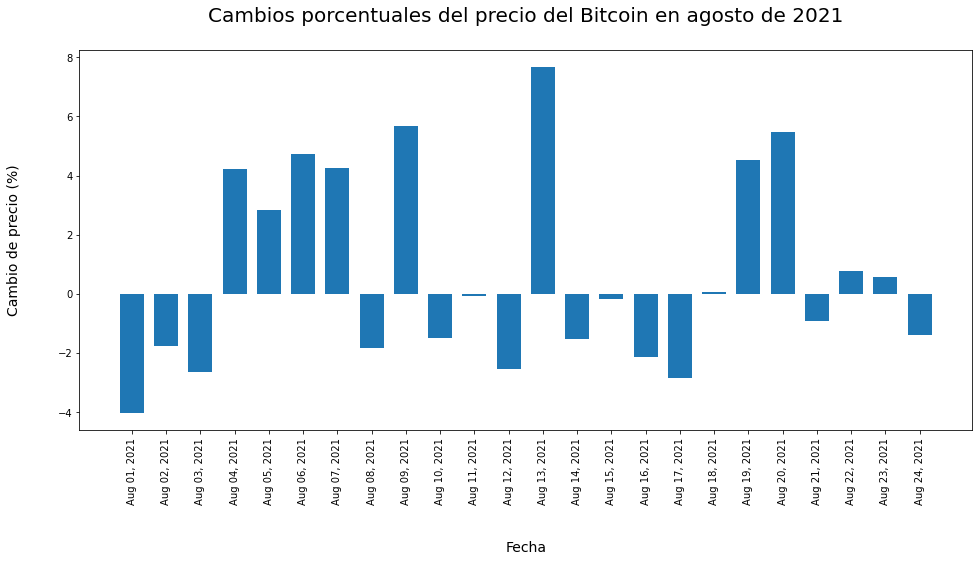

In [239]:
# Fuente de apoyo: https://pythonbros.com/grafica-de-barras-con-matplotlib/

# Ejes
#Fuente de apoyo para invertir orden de los datos: https://www.delftstack.com/es/howto/python/python-reverse-a-list/
# X
idx = len(df['Date'].head(24)) - 1
newListx = []

while (idx >= 0):
  newListx.append(df['Date'].head(24)[idx])
  idx = idx - 1
x = newListx

# Y
idy = len(df['Change %'].head(24)) - 1
newListy = []

while (idy >= 0):
  newListy.append(df['Change %'].head(24)[idy])
  idy = idy - 1
y = newListy

# Crear gráfica
plt.figure(figsize = (16,7))
plt.bar(x, y, width = 0.7)
plt.ylabel("Cambio de precio (%)\n\n", fontsize = 14)
plt.xlabel("\n\nFecha", fontsize = 14)
plt.title("Cambios porcentuales del precio del Bitcoin en agosto de 2021\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

# Mostrar
plt.show()


El mejor cambio para el Bitcoin fue el 13 de agosto, ya que es el cambio positivo mayor del mes. Ha habido caidas en el precio, pero como podemos apreciar en la gráfica de barras, los cambios positivos son mayores que los cambios negativos.

**- Para puntos extras (Realizar una comparacion entre dos gráficas diferentes que parezcan dar la misma información. Cual es mejor en cual caso y explicar porque):**

Queremos hacer una gráfica del volumen anual, por lo que debemos calcularlo:

In [240]:
vol_data = {'Año': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
            'Volumen': [df['Vol.'][3889:4056].sum(), df['Vol.'][3524:3889].sum(), df['Vol.'][3158:3524].sum(), df['Vol.'][2793:3158].sum(),
                        df['Vol.'][2428:2793].sum(), df['Vol.'][2063:2428].sum(), df['Vol.'][1697:2063].sum(), df['Vol.'][1332:1697].sum(),
                        df['Vol.'][967:1332].sum(), df['Vol.'][602:967].sum(), df['Vol.'][236:602].sum(), df['Vol.'][0:236].sum()]}
v_año = pd.DataFrame(vol_data, columns = ['Año', 'Volumen'])
v_año

,Año,Volumen
0,2010,2666280.0
1,2011,13525930.0
2,2012,20229180.0
3,2013,18007040.0
4,2014,4412190.0
5,2015,27580980.0
6,2016,19602750.0
7,2017,37438920.0
8,2018,345605248.0
9,2019,358172256.0


Ahora que tenemos los datos requeridos, procedemos a hacer la gráfica de barras

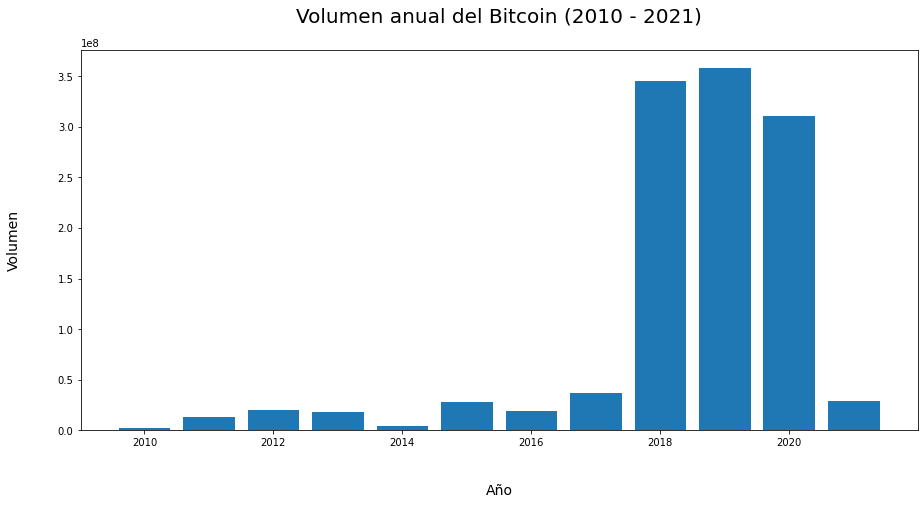

In [241]:
# Ejes
x = v_año['Año']
y = v_año['Volumen']

# Crear gráfica
plt.figure(figsize = (15,7))
plt.bar(x, y)
plt.ylabel("Volumen\n\n", fontsize = 14)
plt.xlabel("\n\nAño", fontsize = 14)
plt.title("Volumen anual del Bitcoin (2010 - 2021)\n", fontsize = 20)

# Mostrar
plt.show()


Como vemos, en 2018, 2019 y 2020, el volumen fue mucho mayor con respecto a los demás años. Consideremos que en 2010 y 2021 solo había datos de aproximadamente medio año.

Viendo la proporción, tenemos:

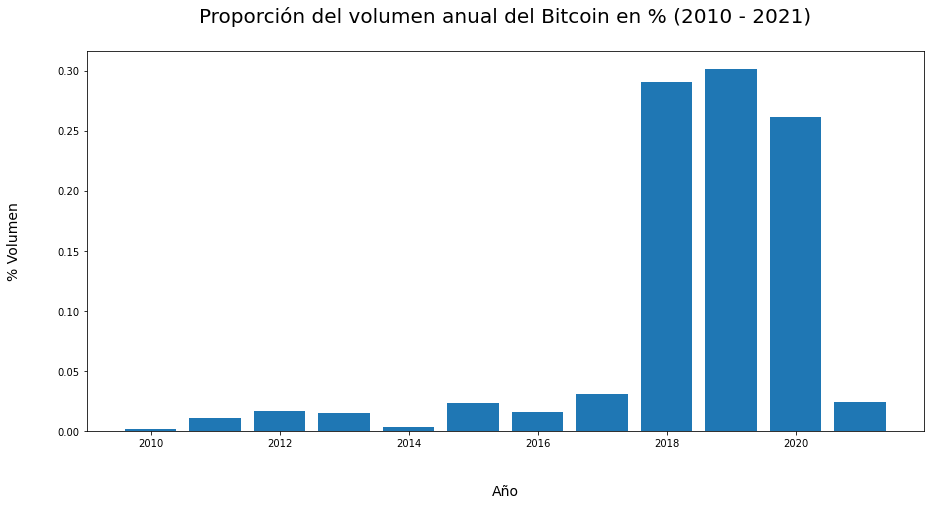

In [242]:
# Ejes
x = v_año['Año']
y = v_año['Volumen'] / v_año['Volumen'].sum()

# Crear gráfica
plt.figure(figsize = (15,7))
plt.bar(x, y)
plt.ylabel("% Volumen\n\n", fontsize = 14)
plt.xlabel("\n\nAño", fontsize = 14)
plt.title("Proporción del volumen anual del Bitcoin en % (2010 - 2021)\n", fontsize = 20)

# Mostrar
plt.show()

Como vemos en la gráfica anterior (proporción), la cual se ve igual que la gráfica del volumen anual, podemos apreciar que casi el 90% del volumen del Bitcoin de 2010 a 2021, pertenece a los años 2018, 2019 y 2020, siendo el año 2019 el año con mayor volumen de Bitcoin.

Entonces, tenemos 2 gráficas que parecen iguales, pero en realidad son diferentes. Una da los datos tal cual, y la otra nos da las proporciones.

Dependiendo de lo que se desee saber, es cuál de las 2 es mejor. Por ejemplo, si solo quiero saber en cuáles años hubo más volumen de Bitcoin, puedo usar la gráfica de proporciones. Pero si quiero algo más específico, y saber las cantidades, se debe usar la gráfica del volumen y no la de proporción.

**(Fin de la explicación para los puntos extras de la comparación de gráficas)**

- Gráfica de lineas

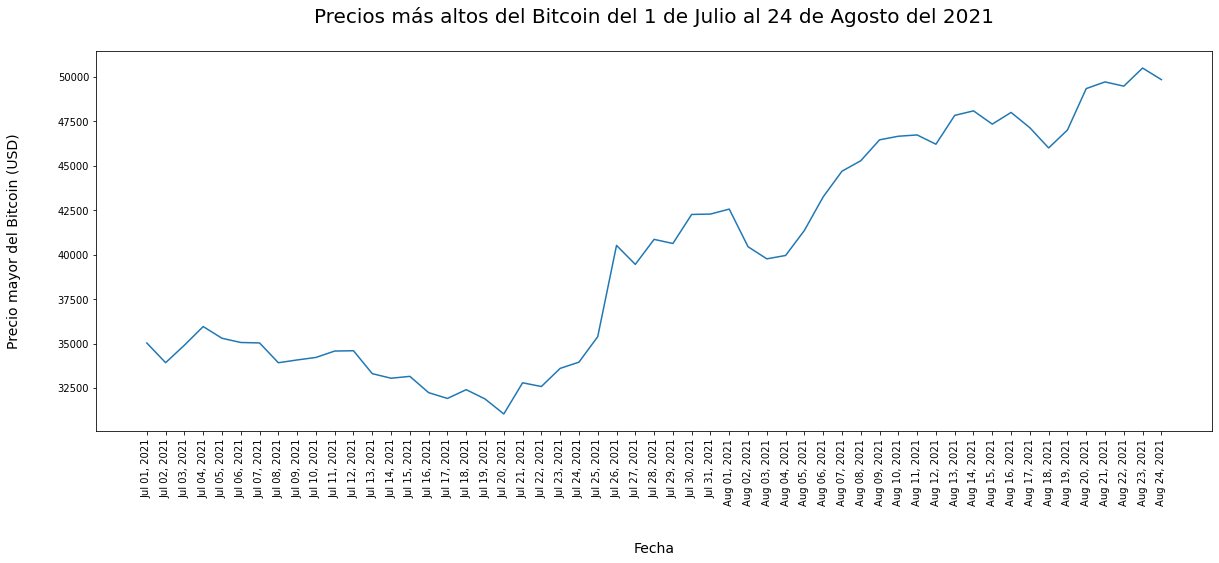

In [243]:
# Ejes
# X
idx = len(df['Date'].head(55)) - 1
newListx = []

while (idx >= 0):
  newListx.append(df['Date'].head(55)[idx])
  idx = idx - 1
x = newListx

# Y
idy = len(df['High'].head(55)) - 1
newListy = []

while (idy >= 0):
  newListy.append(df['High'].head(55)[idy])
  idy = idy - 1
y = newListy

# Crear gráfica
fig, ax = plt.subplots(figsize = (20, 7))
ax.plot(x, y) # Fuente de apoyo para la linea anterior y esta: https://aprendeconalf.es/docencia/python/manual/matplotlib/
plt.ylabel("Precio mayor del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\n\nFecha", fontsize = 14)
plt.title("Precios más altos del Bitcoin del 1 de Julio al 24 de Agosto del 2021\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

# Mostrar
plt.show()

Como vemos en la gráfica anterior, el "precio máximo" que alcanzaba el bitcoin cada día del 1 de julio al 24 de agosto del 2021, fue aumentando con el tiempo. CLaro que con algunas bajas, pero la tendencia es creciente.

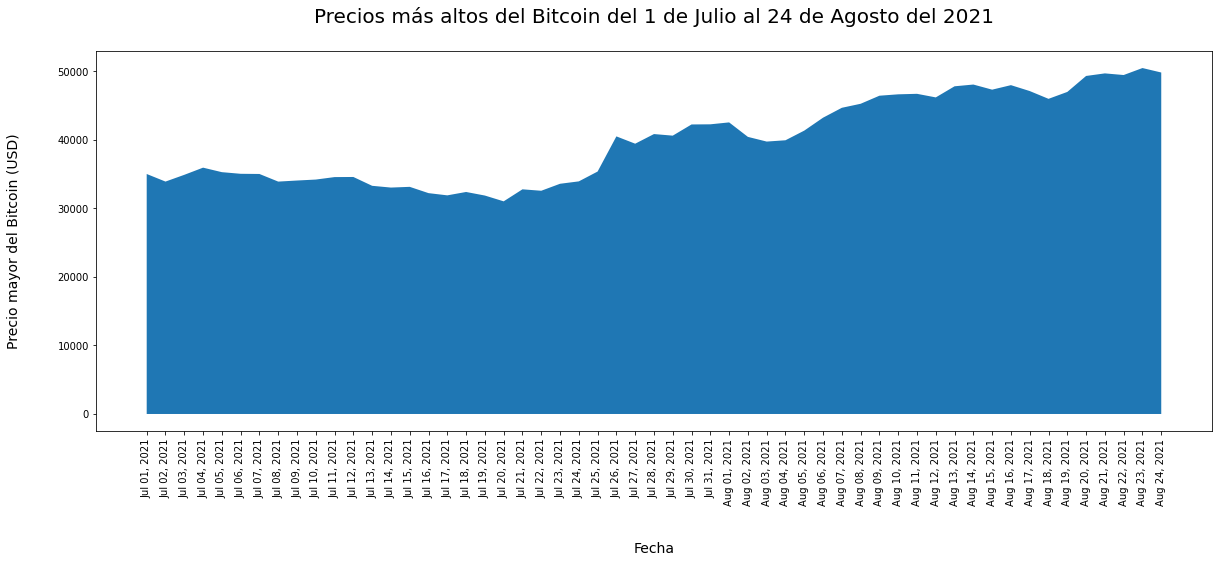

In [244]:
# Ejes
# X
idx = len(df['Date'].head(55)) - 1
newListx = []

while (idx >= 0):
  newListx.append(df['Date'].head(55)[idx])
  idx = idx - 1
x = newListx

# Y
idy = len(df['High'].head(55)) - 1
newListy = []

while (idy >= 0):
  newListy.append(df['High'].head(55)[idy])
  idy = idy - 1
y = newListy

# Crear gráfica
fig, ax = plt.subplots(figsize = (20, 7))
ax.fill_between(x, y) # Fuente de apoyo para la linea anterior y esta: https://aprendeconalf.es/docencia/python/manual/matplotlib/
plt.ylabel("Precio mayor del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\n\nFecha", fontsize = 14)
plt.title("Precios más altos del Bitcoin del 1 de Julio al 24 de Agosto del 2021\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

# Mostrar
plt.show()

La gráfica anterior nos ayuda a ver la magnitud de los cambios en el precio máximo del Bitcoin del 1 de julio al 24 de agosto de mejor manera que en el gráfico de lineas, ya que en el gráfico de lineas mostrado anteriormente, se ven los datos "con zoom", ya que el mínimo del eje Y es poco menos de 32500, mientras que en el gráfico de área, abarca hasta el 0. De esta forma es más fácil ver la magnitud de los cambios.

- Histograma

Text(0, 0.5, 'Frecuencia')

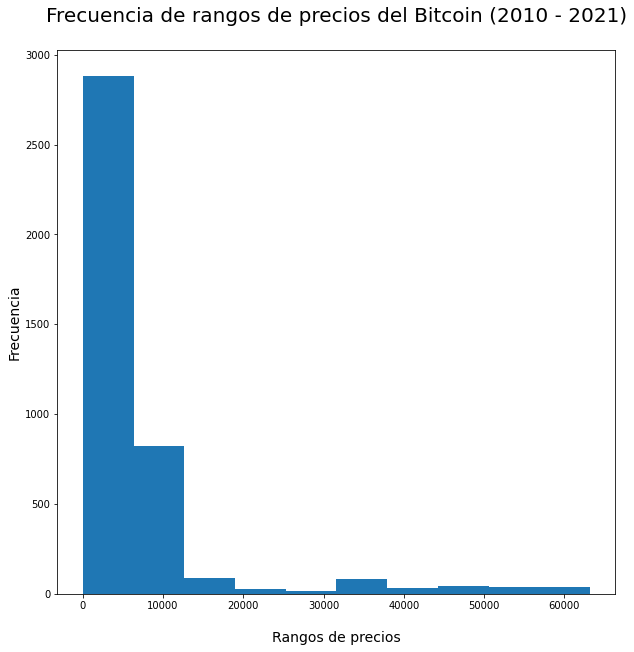

In [245]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.xlabel("\nRangos de precios", fontsize = 14)
plt.title("Frecuencia de rangos de precios del Bitcoin (2010 - 2021)\n", fontsize = 20)
df[df['Price'] < max(df['Price'])]['Price'].plot.hist()
plt.ylabel("Frecuencia", fontsize = 14)

De la gráfica anterior podemos decir que el precio más "común" es de 0 a 10,000 USD. Esto pude ser debido a que al inicio, como no se sabía mucho del Bitcoin, no podía estar muy caro, por lo que el precio era bajo. Pero con el tiempo fue mejorando hasta llegar a precios mayores a 50,000 USD. En el histograma no se ven los tiempos, pero de las gráficas anteriores al histograma puede interpretarse lo mencionado.

## Gráficas de datos bi-variantes

- Gráfica de dispersión

Text(0, 0.5, 'Precio (USD)\n')

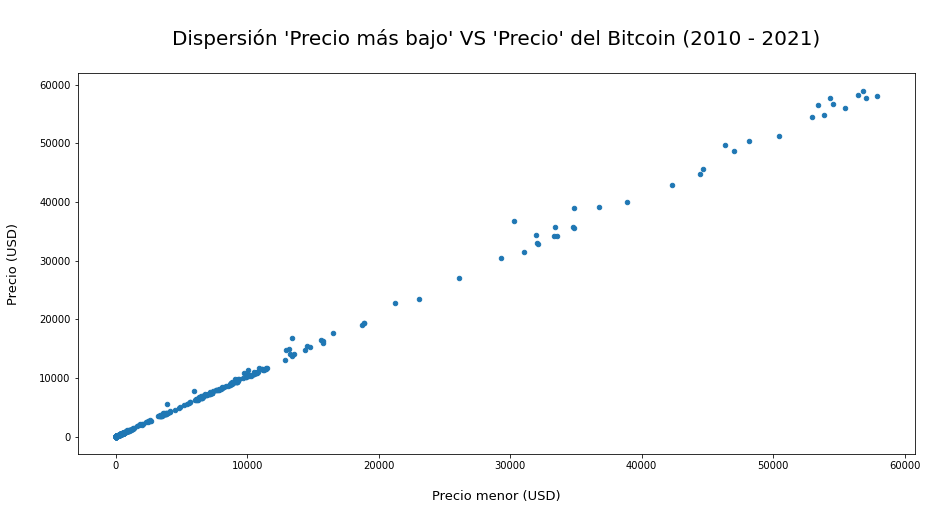

In [246]:
df[df['Price'] < 70000].sample(500).plot.scatter(x = 'Low', y = 'Price', figsize = (15, 7))
plt.title("\nDispersión 'Precio más bajo' VS 'Precio' del Bitcoin (2010 - 2021)\n", fontsize = 20)
plt.xlabel("\nPrecio menor (USD)", fontsize = 13)
plt.ylabel("Precio (USD)\n", fontsize = 13)

Como vemos en la gráfica de dispersión, el precio y el precio menor del Bitcoin (Price, Low) están muy relacionados. Dependiendo de cuánto sea el precio menor (Low), será el precio del Bitcoin (Price) cada día.

(Se usaron 500 muestras para poder ver mejor la dispersión en los precios más altos)

- Gráfica hexagonal

In [247]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 24, 2021",48846.300781,49532.500000,49847.398438,48812.398438,59890.0,-1.40
1,"Aug 23, 2021",49539.699219,49255.398438,50498.800781,49038.601562,75370.0,0.58
2,"Aug 22, 2021",49254.500000,48870.398438,49480.300781,48151.000000,49320.0,0.77
3,"Aug 21, 2021",48875.800781,49330.000000,49719.101562,48293.500000,18200.0,-0.91
4,"Aug 20, 2021",49324.000000,46756.699219,49343.300781,46646.800781,83190.0,5.49


Text(0, 0.5, 'Precio')

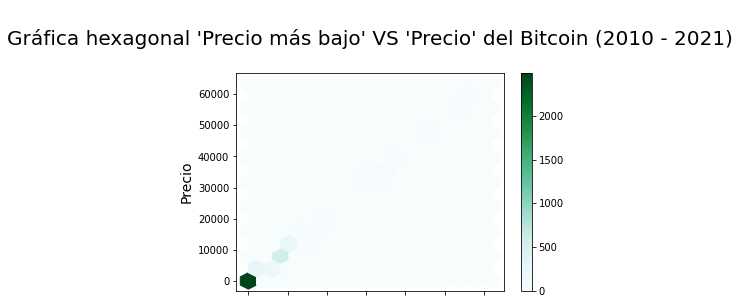

In [248]:
df[df['Price'] < 70000].plot.hexbin(x = 'Low', y = 'Price', gridsize = 15)
plt.title("\nGráfica hexagonal 'Precio más bajo' VS 'Precio' del Bitcoin (2010 - 2021)\n", fontsize = 20)
plt.ylabel("Precio", fontsize = 14)

Como vemos en la gráfica anterior, podemos ver mejor que la mayoría de los precios están entre 0 y 10,000 USD según los precios más bajos diarios.

En la gráfica de dispersión lo pudimos ver solo un poco, ya que solo se usó una muestra de 500 elementos, pero ahora se usaron todos y se puede ver que los precios más frecuentes van de 0 a 10,000.

## Stacked plots

- La gráfica de barras mencionada en el código de la práctica no se puede hacer debido a la naturaleza de los datos. Son precios y porcentajes de cambio, por lo que no hay un total para ven bien alguna proporción en dicha gráfica.

- Gráfica de lineas

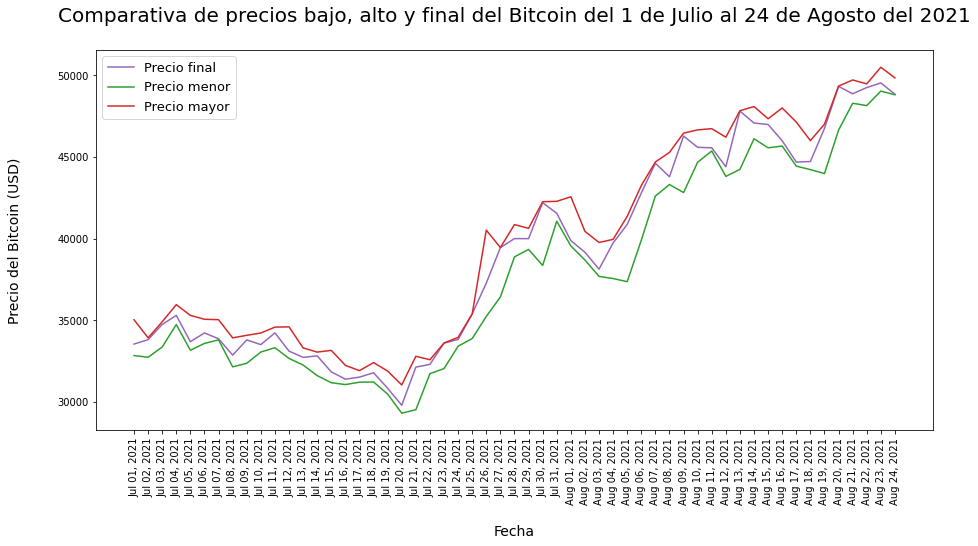

In [249]:
# Fecha
a = len(df['Date'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Date'].head(55)[a])
  a = a - 1
fecha = f

# Precio
a = len(df['Price'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Price'].head(55)[a])
  a = a - 1
precio = f

# Mayor
a = len(df['High'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['High'].head(55)[a])
  a = a - 1
mayor = f

# Menor
a = len(df['Low'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Low'].head(55)[a])
  a = a - 1
menor = f

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(fecha, precio, color = 'tab:purple', label = "Precio final")
ax.plot(fecha, menor, color = 'tab:green', label = "Precio menor")
ax.plot(fecha, mayor, color = 'tab:red', label = "Precio mayor")
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel("Precio del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\nFecha", fontsize = 14)
plt.title("Comparativa de precios bajo, alto y final del Bitcoin del 1 de Julio al 24 de Agosto del 2021\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.show()

Como vemos en la gráfica comparativa de los precios, como era de esperarse, el precio final del Bitcoin cada día está entre el precio menor y el mayor. También podemos ver que en algunas ocasiones el precio al final del día es casi igual al precio mayor o al menor.

Además, los precios mayor y menor siempre parecen estar muy lejos uno del otro. Nunca están muy cerca de ser iguales (almenos del 1 de julio al 24 de agosto)

- Gráfica de área

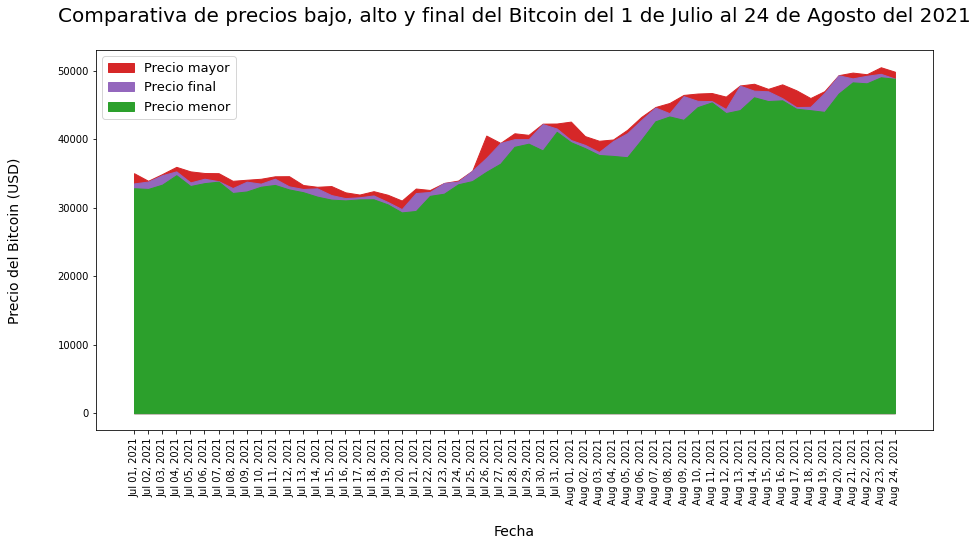

In [250]:
# Fecha
a = len(df['Date'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Date'].head(55)[a])
  a = a - 1
fecha = f

# Precio
a = len(df['Price'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Price'].head(55)[a])
  a = a - 1
precio = f

# Mayor
a = len(df['High'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['High'].head(55)[a])
  a = a - 1
mayor = f

# Menor
a = len(df['Low'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Low'].head(55)[a])
  a = a - 1
menor = f

fig, ax = plt.subplots(figsize = (15,7))
ax.fill_between(fecha, mayor, color = 'tab:red', label = "Precio mayor")
ax.fill_between(fecha, precio, color = 'tab:purple', label = "Precio final")
ax.fill_between(fecha, menor, color = 'tab:green', label = "Precio menor")
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel("Precio del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\nFecha", fontsize = 14)
plt.title("Comparativa de precios bajo, alto y final del Bitcoin del 1 de Julio al 24 de Agosto del 2021\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.show()

Aquí podemos ver mejor que el precio al final de cada día está entre el mayor y el menor precio, ya que el área bajo la línea de cada precio está pintada de diferente color. 

Así podemos ver la magnitud de cada cambio de los precios del Bitcoin comparados con el precio mayor y el menor de cada día.

## Seaborn

Librería necesaria

In [251]:
import seaborn as sns

- La gráfica de barras con esta librería no se puede hacer debido a la naturaleza de los datos. No hay nada para contar, ya que los datos son diarios y hay muy pocos datos que se repiten.

- Gráfica KDE

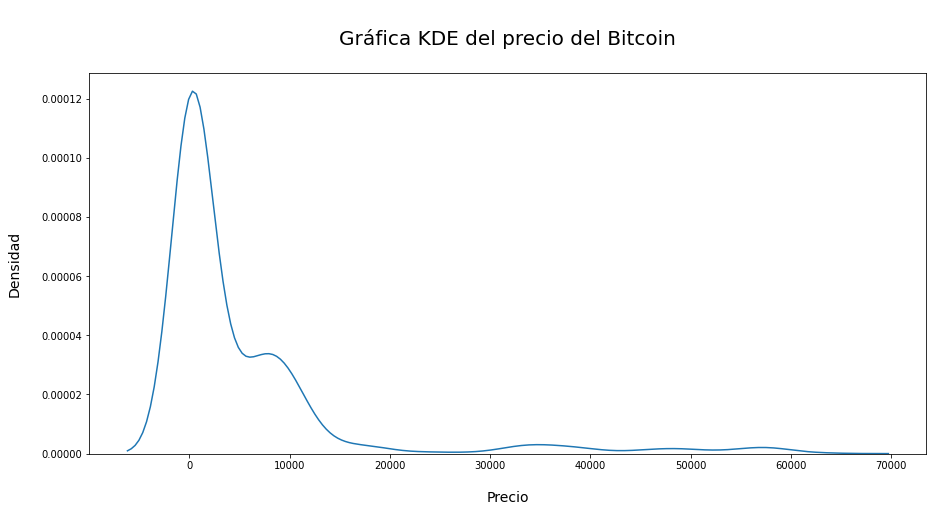

In [252]:
fig, ax = plt.subplots(figsize = (15, 7))
plt.title("\nGráfica KDE del precio del Bitcoin\n", fontsize = 20)
plt.ylabel("Densidad\n", fontsize = 14)
plt.xlabel("\nPrecio", fontsize = 14)
sns.kdeplot(df.query('Price < 70000').Price)

Como podemos ver, la mayor densidad de los precios se encuentra alrededor del 0, es decir, hay más datos alrededor del 0 en comparación con los demás precios. Como se ha visto hasta ahora.

- Gráfica de distancia

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '\nPrecio')

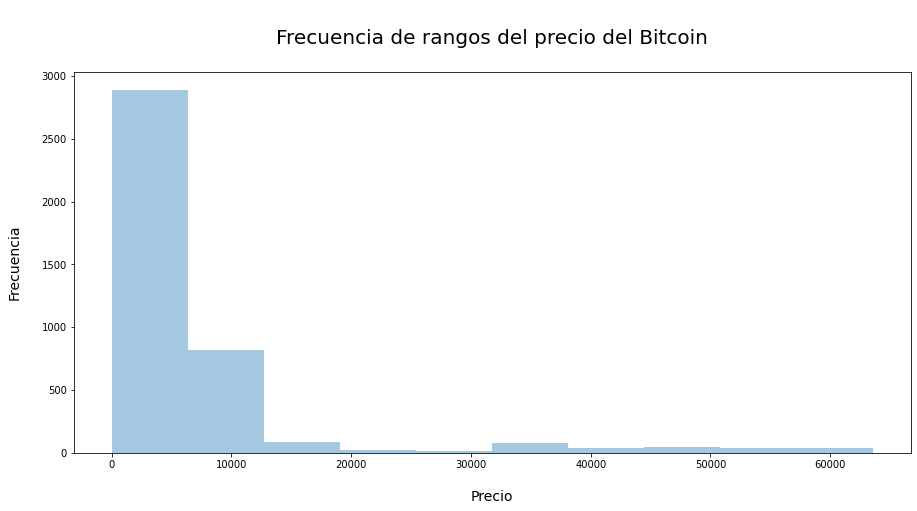

In [253]:
fig, ax = plt.subplots(figsize = (15, 7))
plt.title("\nFrecuencia de rangos del precio del Bitcoin\n", fontsize = 20)
plt.ylabel("Frecuencia\n", fontsize = 14)
sns.distplot(df['Price'], bins=10, kde=False)
plt.xlabel("\nPrecio", fontsize = 14)

Como vemos, es lo mismo que el histograma de matplotlib

- Gráfica jointplot

Text(0.5, 1.0, '\nGráfica joinplot precio vs menor precio del Bitcoin\n\n\n\n')

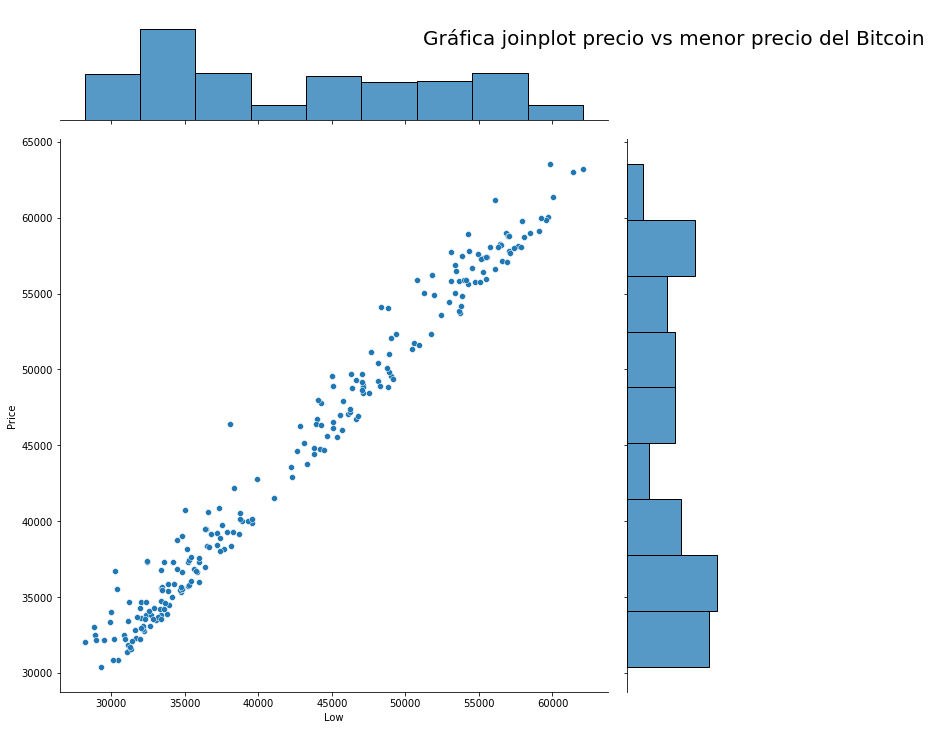

In [254]:
sns.jointplot(x = 'Low', y = 'Price', data = df[df['Price'] >= 30000], height=10)
plt.title("\nGráfica joinplot precio vs menor precio del Bitcoin\n\n\n\n", fontsize = 20)

Esta gráfica es como la gráfica de dispersión de matplotlib, pero con histogramas, por lo que esta gráfica está más completa. Así, tenemos la distribución de los datos, que como vemos es muy similar a la gráfica de dispersión que vimos antes, y además tenemos una idea de las frecuancias de cada rango de precios gracias a los histogramas. Así, como vemos, en el intervalo de precios que se usó (>30000 para una mejor visualización de los histogramas y los puntos) la mayor frecuencia esta alrededor de los 30,000 USD

- Gráfica jointplot hexagonal

Text(0.5, 68.99999999999991, '\nPrecio menor (USD)')

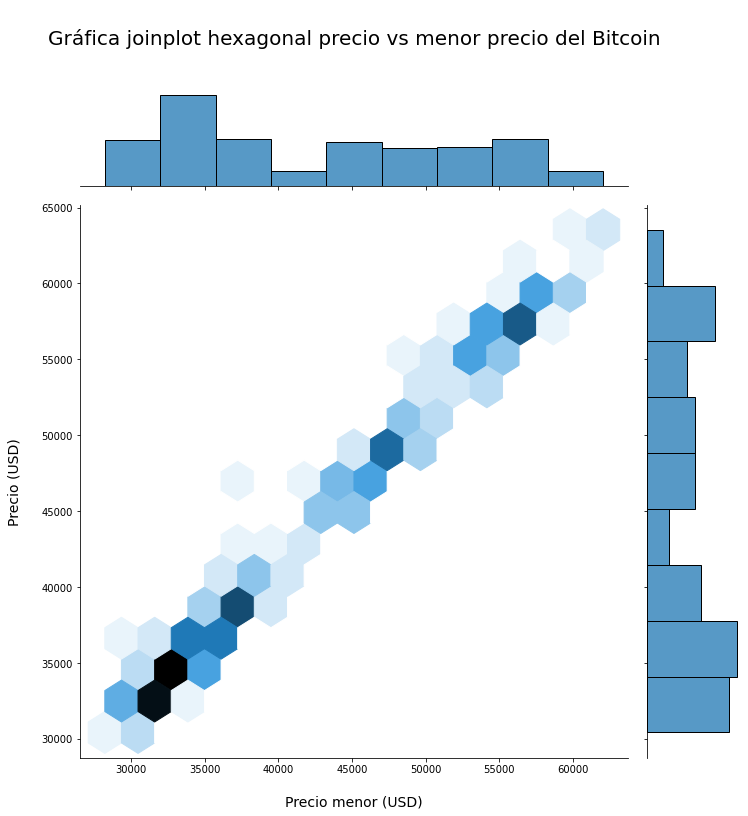

In [255]:
sns.jointplot(x = 'Low', y = 'Price', data = df[df['Price'] >= 30000], kind = 'hex', height=10, gridsize = 15)
plt.title("\nGráfica joinplot hexagonal precio vs menor precio del Bitcoin\n\n\n\n\n\n\n", fontsize = 20)
plt.ylabel("Precio (USD)\n", fontsize = 14)
plt.xlabel("\nPrecio menor (USD)", fontsize = 14)

Como vemos, los histogramas son iguales que en el jointplot anterior (el de dispersión), y los hexágonos nos muestran que la mayoría de los precios se encuentran entre 30,000 y 40,000 USD (Se usó el mismo intervalo de precios, es decir, precios > 30,000)

## Box plots

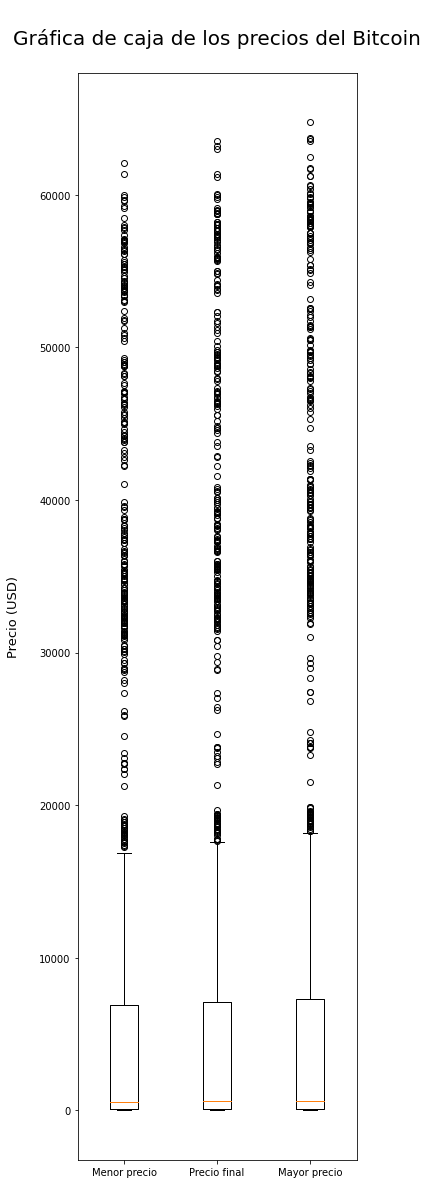

In [256]:
fig, ax = plt.subplots(figsize = (5, 20))
# Fuente de apoyo: https://www.delftstack.com/es/howto/matplotlib/matplotlib-boxplot-python/
plt.boxplot(x = (df['Low'], df['Price'], df['High']), labels = ("Menor precio", "Precio final", "Mayor precio"))
plt.title("\nGráfica de caja de los precios del Bitcoin\n", fontsize = 20)
plt.ylabel("Precio (USD)\n", fontsize = 13)
plt.show()

Como vemos en las gráficas de caja anteriores, los precios (menor, final y mayor) se comportan más o menos igual. Pero lo importante aquí, es que como la mayoría de los datos indican que el precio está entre 0 y 10,000 entonces los "pocos" datos que son mayores a estos valores se toman como datos atípicos. Por eso hay varios puntos guera de los "bigotes" de las cajas. No necesariemente significa que están equivocados los datos.

- Gráfica de violín

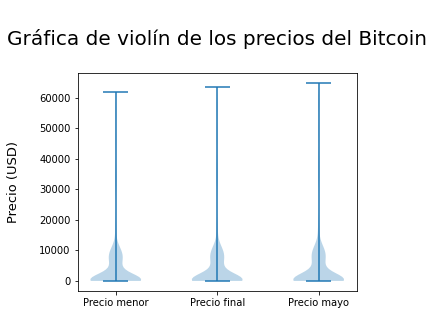

In [257]:
fig, ax = plt.subplots(figsize = (5, 4))
# Fuente de apoyo: https://pharos.sh/trama-de-violin-de-matplotlib-tutorial-y-ejemplos/
plt.violinplot([df['Low'], df['Price'], df['High']])
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Precio menor", "Precio final", "Precio mayo"])
plt.title("\nGráfica de violín de los precios del Bitcoin\n", fontsize = 20)
plt.ylabel("Precio (USD)\n", fontsize = 13)
plt.show()

Como vemos en la gráfica de violín, la mayor frecuencia de precios está entre el 0 y el 10,000. Y pasa lo mismo con la gráfica de caja.

No parecen violines en la gráfica, pero esto es debido a que los violines están muy abajo por la frecuencia de los datos.

- Matriz de gráficas

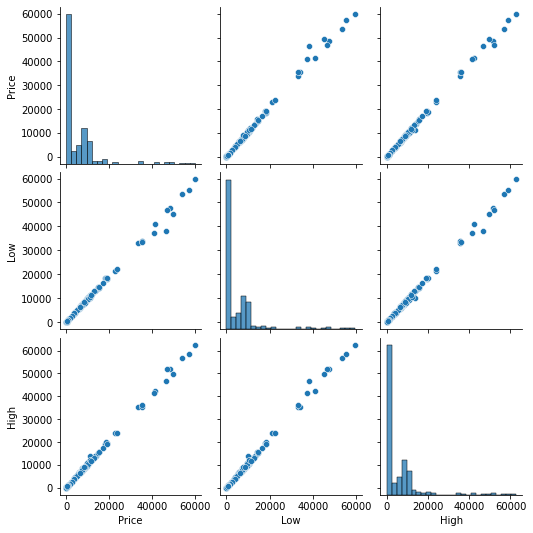

In [258]:
sns.pairplot(df[['Price', 'Low', 'High']].sample(300))

En esta metriz de gráficas podemos ver desglosado lo que se ha mencionado antes acerca de la relación entre los 3 precios (menor, mayor y final). Están muy relacionados todos, y la mayoría de los precios están entre 0 y 10,000.

## Gráficas multivariantes

- Las gráficas multivariantes no se pueden hacer, ya que se requieren de 3 variables. 2 variables que mostrarán frecuencia, y otra de clasificación. Por la naturaleza de los datos no hay clasificación. Casi todos los datos son distintos entre sí, por lo que es difícil encontrar una clasificación significativa.

## Mapa de correlación

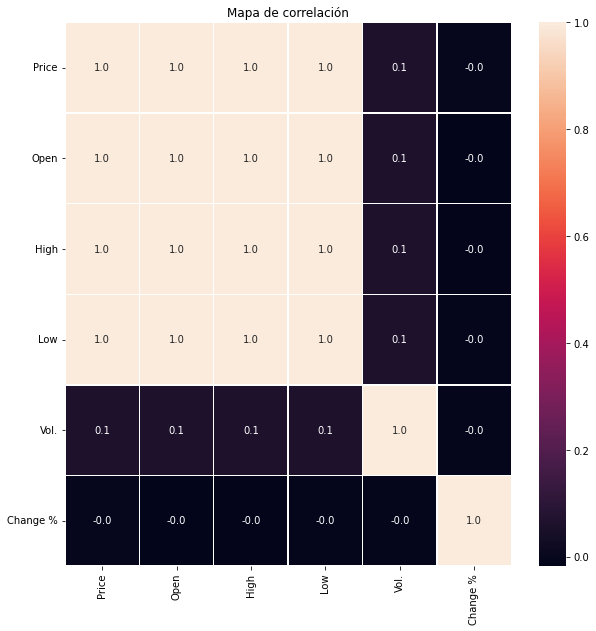

In [259]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot= True, linewidths = 0.5, fmt = ".1f", ax = ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Por último, se puede ver que hay una muy buena correlación entre los precios. Pero por lo que parece, el % de cambio y el volumen no tienen nada que ver con las demás variables.

# 2.- Base de Datos: Conjunto de datos de análisis y predicción de ataques cardíacos

**(Titulo Alternativo)**

> A) Heart Attack Analysis & Prediction Dataset

> B) https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

## Información estadística básica

Librerías necesarias

In [260]:
import pandas as pd

Importamos los datos

In [261]:
df2 = pd.read_csv("/content/heart.csv")
df2.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Los nombres de las columnas no se entienden. Procedemos a cambiarlos

In [262]:
df2.rename(columns = {'age':'Edad', 'sex':"Sexo", 'cp':'Dolor_pecho', 'trtbps':'Presión_reposo', 'chol':'Colesterol', 'fbs':'Azúcar_ayunas',
                      'restecg':'Resultado_electro_reposo', 'thalachh':'Max_frecuencia_cardíaca', 'exng':'Angina_por_ejercicio', 'oldpeak':'Pico_anterior',
                      'slp':'Pendiente', 'caa':'Número_vasos', 'thall':'Frecuencia cardíaca', 'output':'Paro'}, inplace = True)
df2.head(3)

,Edad,Sexo,Dolor_pecho,Presión_reposo,Colesterol,Azúcar_ayunas,Resultado_electro_reposo,Max_frecuencia_cardíaca,Angina_por_ejercicio,Pico_anterior,Pendiente,Número_vasos,Frecuencia cardíaca,Paro
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


La base está lista

- Suma de los elementos de las columnas

In [263]:
for i in range(0, len(df2.columns)):
  print("La suma de los elementos de la columna", df2.columns[i], "es", df2[df2.columns[i]].sum())

La suma de los elementos de la columna Edad es 16473
La suma de los elementos de la columna Sexo es 207
La suma de los elementos de la columna Dolor_pecho es 293
La suma de los elementos de la columna Presión_reposo es 39882
La suma de los elementos de la columna Colesterol es 74618
La suma de los elementos de la columna Azúcar_ayunas es 45
La suma de los elementos de la columna Resultado_electro_reposo es 160
La suma de los elementos de la columna Max_frecuencia_cardíaca es 45343
La suma de los elementos de la columna Angina_por_ejercicio es 99
La suma de los elementos de la columna Pico_anterior es 315.0
La suma de los elementos de la columna Pendiente es 424
La suma de los elementos de la columna Número_vasos es 221
La suma de los elementos de la columna Frecuencia cardíaca es 701
La suma de los elementos de la columna Paro es 165


- Promedio de los elementos de las columnas

In [264]:
for i in range(0, len(df2.columns)):
  print("El promedio de los elementos de la columna", df2.columns[i], "es", df2[df2.columns[i]].mean())

El promedio de los elementos de la columna Edad es 54.366336633663366
El promedio de los elementos de la columna Sexo es 0.6831683168316832
El promedio de los elementos de la columna Dolor_pecho es 0.966996699669967
El promedio de los elementos de la columna Presión_reposo es 131.62376237623764
El promedio de los elementos de la columna Colesterol es 246.26402640264027
El promedio de los elementos de la columna Azúcar_ayunas es 0.1485148514851485
El promedio de los elementos de la columna Resultado_electro_reposo es 0.528052805280528
El promedio de los elementos de la columna Max_frecuencia_cardíaca es 149.64686468646866
El promedio de los elementos de la columna Angina_por_ejercicio es 0.32673267326732675
El promedio de los elementos de la columna Pico_anterior es 1.0396039603960396
El promedio de los elementos de la columna Pendiente es 1.3993399339933994
El promedio de los elementos de la columna Número_vasos es 0.7293729372937293
El promedio de los elementos de la columna Frecuenci

- Suma acumulada de las columnas fila por fila

In [265]:
for i in range(0, len(df2.columns)):
  print("La suma acumulada de los elementos de la columna ", df2.columns[i], "es\n", df2[df2.columns[i]].cumsum(), "\n")

La suma acumulada de los elementos de la columna  Edad es
 0         63
1        100
2        141
3        197
4        254
       ...  
298    16246
299    16291
300    16359
301    16416
302    16473
Name: Edad, Length: 303, dtype: int64 

La suma acumulada de los elementos de la columna  Sexo es
 0        1
1        2
2        2
3        3
4        3
      ... 
298    204
299    205
300    206
301    207
302    207
Name: Sexo, Length: 303, dtype: int64 

La suma acumulada de los elementos de la columna  Dolor_pecho es
 0        3
1        5
2        6
3        7
4        7
      ... 
298    289
299    292
300    292
301    292
302    293
Name: Dolor_pecho, Length: 303, dtype: int64 

La suma acumulada de los elementos de la columna  Presión_reposo es
 0        145
1        275
2        405
3        525
4        645
       ...  
298    39368
299    39478
300    39622
301    39752
302    39882
Name: Presión_reposo, Length: 303, dtype: int64 

La suma acumulada de los elementos de la c

- Resumen estadístico de las columnas

In [266]:
for i in range(0, len(df2.columns)):
  print("Resumen estadístico de la columna", df2.columns[i], ":\n", df2[df2.columns[i]].describe(), "\n")

Resumen estadístico de la columna Edad :
 count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: Edad, dtype: float64 

Resumen estadístico de la columna Sexo :
 count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sexo, dtype: float64 

Resumen estadístico de la columna Dolor_pecho :
 count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Dolor_pecho, dtype: float64 

Resumen estadístico de la columna Presión_reposo :
 count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Presión_reposo, dtype: float64 

Resumen estadístico de la columna Colester

- Cantidad de elementos no nulos en las columnas

In [267]:
for i in range(0, len(df2.columns)):
  print("La columna", df2.columns[i], "tiene", df2[df2.columns[i]].count(), "elementos no nulos")

La columna Edad tiene 303 elementos no nulos
La columna Sexo tiene 303 elementos no nulos
La columna Dolor_pecho tiene 303 elementos no nulos
La columna Presión_reposo tiene 303 elementos no nulos
La columna Colesterol tiene 303 elementos no nulos
La columna Azúcar_ayunas tiene 303 elementos no nulos
La columna Resultado_electro_reposo tiene 303 elementos no nulos
La columna Max_frecuencia_cardíaca tiene 303 elementos no nulos
La columna Angina_por_ejercicio tiene 303 elementos no nulos
La columna Pico_anterior tiene 303 elementos no nulos
La columna Pendiente tiene 303 elementos no nulos
La columna Número_vasos tiene 303 elementos no nulos
La columna Frecuencia cardíaca tiene 303 elementos no nulos
La columna Paro tiene 303 elementos no nulos


- Mínimo y máximo de cada columna

In [268]:
for i in range(0, len(df2.columns)):
  print("El mínimo de la columna ", df2.columns[i], " es ", df2[df2.columns[i]].min(), " y el máximo es ", df2[df2.columns[i]].max())

El mínimo de la columna  Edad  es  29  y el máximo es  77
El mínimo de la columna  Sexo  es  0  y el máximo es  1
El mínimo de la columna  Dolor_pecho  es  0  y el máximo es  3
El mínimo de la columna  Presión_reposo  es  94  y el máximo es  200
El mínimo de la columna  Colesterol  es  126  y el máximo es  564
El mínimo de la columna  Azúcar_ayunas  es  0  y el máximo es  1
El mínimo de la columna  Resultado_electro_reposo  es  0  y el máximo es  2
El mínimo de la columna  Max_frecuencia_cardíaca  es  71  y el máximo es  202
El mínimo de la columna  Angina_por_ejercicio  es  0  y el máximo es  1
El mínimo de la columna  Pico_anterior  es  0.0  y el máximo es  6.2
El mínimo de la columna  Pendiente  es  0  y el máximo es  2
El mínimo de la columna  Número_vasos  es  0  y el máximo es  4
El mínimo de la columna  Frecuencia cardíaca  es  0  y el máximo es  3
El mínimo de la columna  Paro  es  0  y el máximo es  1


- Mediana, Varianza y desviación estándar de cada columna

In [269]:
for i in range(0, len(df2.columns)):
  print("Columna ", df2.columns[i], "\n   Mediana:", df2[df2.columns[i]].median(), "\n   Varianza:", df2[df2.columns[i]].var(), "\n   Desviación Estándar:", df2[df2.columns[i]].std(), "\n")

Columna  Edad 
   Mediana: 55.0 
   Varianza: 82.48455838961381 
   Desviación Estándar: 9.082100989837858 

Columna  Sexo 
   Mediana: 1.0 
   Varianza: 0.2171660874696753 
   Desviación Estándar: 0.4660108233396251 

Columna  Dolor_pecho 
   Mediana: 1.0 
   Varianza: 1.0651323410486753 
   Desviación Estándar: 1.0320524894832992 

Columna  Presión_reposo 
   Mediana: 130.0 
   Varianza: 307.5864533473212 
   Desviación Estándar: 17.53814281351709 

Columna  Colesterol 
   Mediana: 240.0 
   Varianza: 2686.4267479728114 
   Desviación Estándar: 51.830750987930045 

Columna  Azúcar_ayunas 
   Mediana: 0.0 
   Varianza: 0.126876926103206 
   Desviación Estándar: 0.35619787492797594 

Columna  Resultado_electro_reposo 
   Mediana: 1.0 
   Varianza: 0.27652831508316383 
   Desviación Estándar: 0.525859596359298 

Columna  Max_frecuencia_cardíaca 
   Mediana: 153.0 
   Varianza: 524.6464057001724 
   Desviación Estándar: 22.905161114914087 

Columna  Angina_por_ejercicio 
   Mediana: 0.0 

- Valor de asimetría en los valores de cada columna

In [270]:
for i in range(0, len(df2.columns)):
  print("Los elementos de la columna ", df2.columns[i], " tienen una asimetría de ", df2[df2.columns[i]].skew())

Los elementos de la columna  Edad  tienen una asimetría de  -0.2024633654856539
Los elementos de la columna  Sexo  tienen una asimetría de  -0.791335191480832
Los elementos de la columna  Dolor_pecho  tienen una asimetría de  0.48473236883889675
Los elementos de la columna  Presión_reposo  tienen una asimetría de  0.7137684379181465
Los elementos de la columna  Colesterol  tienen una asimetría de  1.1434008206693387
Los elementos de la columna  Azúcar_ayunas  tienen una asimetría de  1.986651930914452
Los elementos de la columna  Resultado_electro_reposo  tienen una asimetría de  0.16252224492761935
Los elementos de la columna  Max_frecuencia_cardíaca  tienen una asimetría de  -0.5374096526832253
Los elementos de la columna  Angina_por_ejercicio  tienen una asimetría de  0.7425315444212832
Los elementos de la columna  Pico_anterior  tienen una asimetría de  1.269719930601997
Los elementos de la columna  Pendiente  tienen una asimetría de  -0.5083156098165442
Los elementos de la columna

- Característica de forma de su distribución de frecuencias/probabilidad (curtosis)

In [271]:
for i in range(0, len(df2.columns)):
  print("Los elementos de la columna ", df2.columns[i], " tienen una curtosis de ", df2[df2.columns[i]].kurt())

Los elementos de la columna  Edad  tienen una curtosis de  -0.5421671409908408
Los elementos de la columna  Sexo  tienen una curtosis de  -1.3829609835171006
Los elementos de la columna  Dolor_pecho  tienen una curtosis de  -1.1930709803257231
Los elementos de la columna  Presión_reposo  tienen una curtosis de  0.9290540528369715
Los elementos de la columna  Colesterol  tienen una curtosis de  4.505423167753712
Los elementos de la columna  Azúcar_ayunas  tienen una curtosis de  1.9596776292633504
Los elementos de la columna  Resultado_electro_reposo  tienen una curtosis de  -1.3626733034314487
Los elementos de la columna  Max_frecuencia_cardíaca  tienen una curtosis de  -0.06196993057611566
Los elementos de la columna  Angina_por_ejercicio  tienen una curtosis de  -1.4583166825574485
Los elementos de la columna  Pico_anterior  tienen una curtosis de  1.5758130733382507
Los elementos de la columna  Pendiente  tienen una curtosis de  -0.6275207472668787
Los elementos de la columna  Númer

- Correlación de los datos

In [272]:
df2.corr()

,Edad,Sexo,Dolor_pecho,Presión_reposo,Colesterol,Azúcar_ayunas,Resultado_electro_reposo,Max_frecuencia_cardíaca,Angina_por_ejercicio,Pico_anterior,Pendiente,Número_vasos,Frecuencia cardíaca,Paro
Edad,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sexo,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Dolor_pecho,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Presión_reposo,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Colesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Azúcar_ayunas,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
Resultado_electro_reposo,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Max_frecuencia_cardíaca,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Angina_por_ejercicio,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
Pico_anterior,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


- Covarianza de los datos

In [273]:
df2.cov()

,Edad,Sexo,Dolor_pecho,Presión_reposo,Colesterol,Azúcar_ayunas,Resultado_electro_reposo,Max_frecuencia_cardíaca,Angina_por_ejercicio,Pico_anterior,Pendiente,Número_vasos,Frecuencia cardíaca,Paro
Edad,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139,-1.021343
Sexo,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930,-0.065307
Dolor_pecho,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201,0.223330
Presión_reposo,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022,-1.267950
Colesterol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488,-2.203855
Azúcar_ayunas,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983,-0.004983
Resultado_electro_reposo,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858,0.035998
Max_frecuencia_cardíaca,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491,4.818766
Angina_por_ejercicio,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472,-0.102354
Pico_anterior,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462,-0.249452


## Gráficas

Importamos las librerías necesarias

In [274]:
import matplotlib.pyplot as plt

- Gráfica de barras

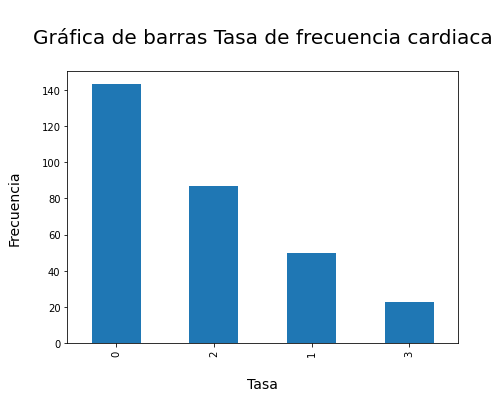

In [296]:
fig, ax = plt.subplots(figsize = (7, 5))
plt.xlabel("\nTasa", fontsize = 14)
plt.ylabel("Frecuencia\n", fontsize = 14)
plt.title("\nGráfica de barras Tasa de frecuencia cardiaca\n", fontsize = 20)
df2['Dolor_pecho'].value_counts().plot.bar()

Primero:
- 0: Angina típica
- 1: Angina atípica
- 2: Dolor sin angina
- 3: Sin dolor

Entonces, de la gráfica podemos decir que la mayoría de las personas observadas tienen dolor por angina y hay muy pocos que no sienten dolor.

- Gráfica de línea

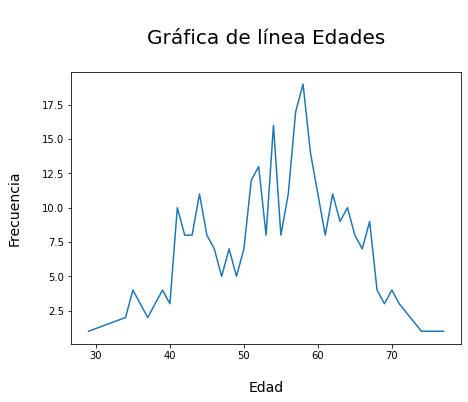

In [276]:
fig, ax = plt.subplots(figsize = (7, 5))
plt.xlabel("\nEdad", fontsize = 14)
plt.ylabel("Frecuencia\n", fontsize = 14)
plt.title("\nGráfica de línea Edades\n", fontsize = 20)
df2['Edad'].value_counts().sort_index().plot.line()

Es fácil ver que de 50 a 60 años parece ser la edad con más riesgo de ataque

- Gráfica de área

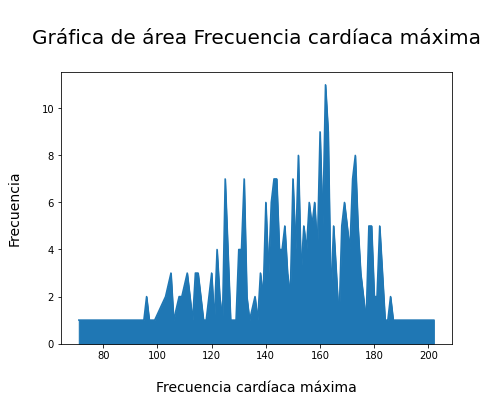

In [277]:
fig, ax = plt.subplots(figsize = (7, 5))
plt.xlabel("\nFrecuencia cardíaca máxima", fontsize = 14)
plt.ylabel("Frecuencia\n", fontsize = 14)
plt.title("\nGráfica de área Frecuencia cardíaca máxima\n", fontsize = 20)
df2['Max_frecuencia_cardíaca'].value_counts().sort_index().plot.area()

Con esto vemos la magnitud de los cambios en la frecuencia cardíaca máxima. Vemos que hay muchos cambios pronunciados

- Histograma

Text(0, 0.5, 'Frecuencia\n')

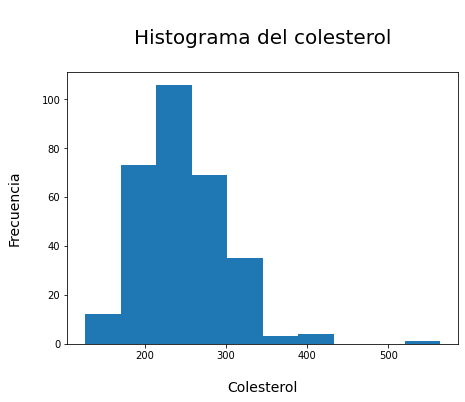

In [278]:
fig, ax = plt.subplots(figsize = (7, 5))
plt.xlabel("\nColesterol", fontsize = 14)
plt.title("\nHistograma del colesterol\n", fontsize = 20)
df2['Colesterol'].plot.hist()
plt.ylabel("Frecuencia\n", fontsize = 14)

Como vemos, hay muchos con el colesterol por arriba de 200

## Graficar datos bi-variantes

- Gráfica de dispersión

Text(0, 0.5, 'Frecuencia cardíaca máxima\n')

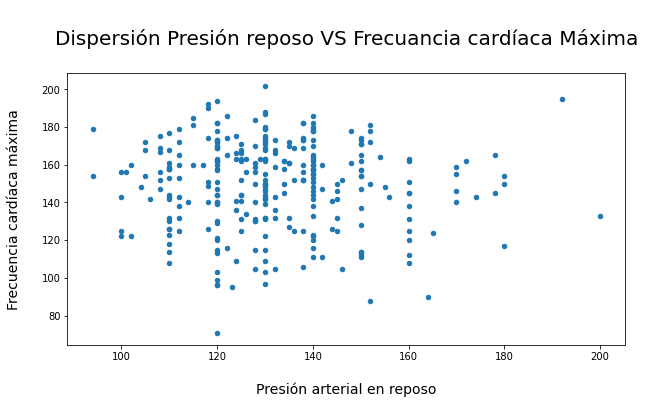

In [279]:
df2.plot.scatter(x = 'Presión_reposo', y = 'Max_frecuencia_cardíaca', figsize = (10, 5))
plt.title("\nDispersión Presión reposo VS Frecuancia cardíaca Máxima\n", fontsize = 20)
plt.xlabel("\nPresión arterial en reposo", fontsize = 14)
plt.ylabel("Frecuencia cardíaca máxima\n", fontsize = 14)

A simple vista, no se ven muy relacionados los datos (presión en reposo y frecuencia cardíaca máxima). Los datos están muy dispersos. No parece haber un patrón

- Gráfica hexagonal

Text(0, 0.5, 'Frecuencia cardíaca máxima\n')

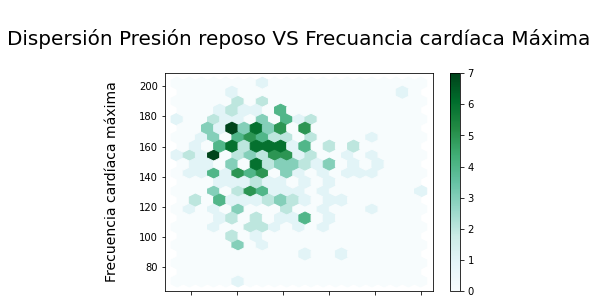

In [280]:
df2.plot.hexbin(x = 'Presión_reposo', y = 'Max_frecuencia_cardíaca', gridsize = 20)
plt.title("\nDispersión Presión reposo VS Frecuancia cardíaca Máxima\n", fontsize = 20)
plt.ylabel("Frecuencia cardíaca máxima\n", fontsize = 14)

Aquí podemos ver más claramente la fecuencia de los datos del gráfico de dispersión anterior

## Stacked plots

- La gráfica de barras no se puede hacer debido a la naturaleza de los datos. Todos los datos toman valores enteros espefíficos, por lo que no es posible tomar todos los datos para hacer una gráfica de estas. Se tendría que separar dependiendo de la variable que se quiere analizar, y revisar los datos únicos para hacer un conteo, pero entonces ya no se visualizarían todos los datos.

- Gráfica de área

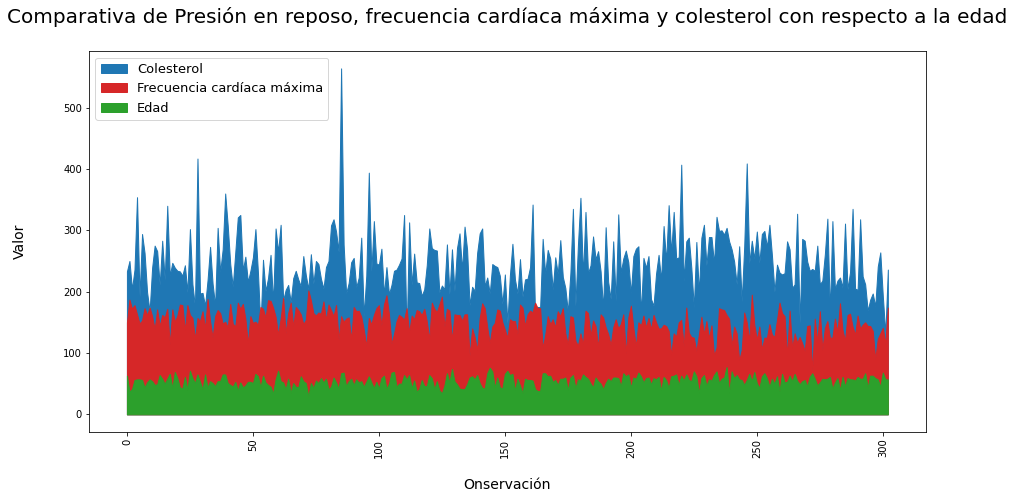

In [281]:
fig, ax = plt.subplots(figsize = (15,7))
ax.fill_between(range(0, len(df2)), df2['Colesterol'], color = 'tab:blue', label = "Colesterol")
ax.fill_between(range(0, len(df2)), df2['Max_frecuencia_cardíaca'], color = 'tab:red', label = "Frecuencia cardíaca máxima")
ax.fill_between(range(0, len(df2)), df2['Edad'], color = 'tab:green', label = "Edad")
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel("Valor\n\n", fontsize = 14)
plt.xlabel("\nOnservación", fontsize = 14)
plt.title("Comparativa de Presión en reposo, frecuencia cardíaca máxima y colesterol con respecto a la edad\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.show()

Como vemos, hay muchos cambios pronunciados, a excepción de las edades. Parece que no cambian mucho

- Gráfica de líneas

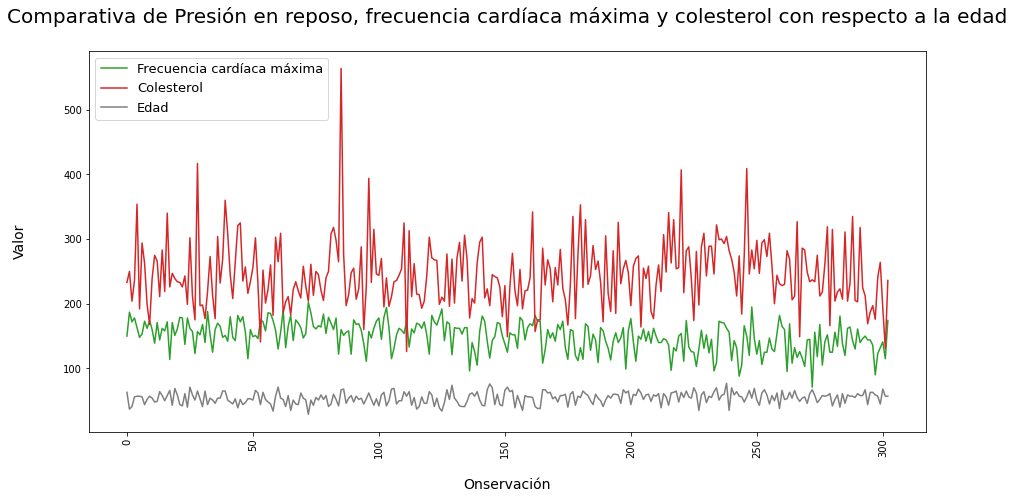

In [282]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(range(0, len(df2)), df2['Max_frecuencia_cardíaca'], color = 'tab:green', label = "Frecuencia cardíaca máxima")
ax.plot(range(0, len(df2)), df2['Colesterol'], color = 'tab:red', label = "Colesterol")
ax.plot(range(0, len(df2)), df2['Edad'], color = 'tab:gray', label = "Edad")
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel("Valor\n\n", fontsize = 14)
plt.xlabel("\nOnservación", fontsize = 14)
plt.title("Comparativa de Presión en reposo, frecuencia cardíaca máxima y colesterol con respecto a la edad\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.show()

Aquí se ve lo mismo que en la gráfica de área, pero los datos se ven más "limpios" y se puede apreciar mejor la frecuencia

## Seaborn

Librería necesaria

In [283]:
import seaborn as sns

- Gráfica de barras

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '\nPico anterior')

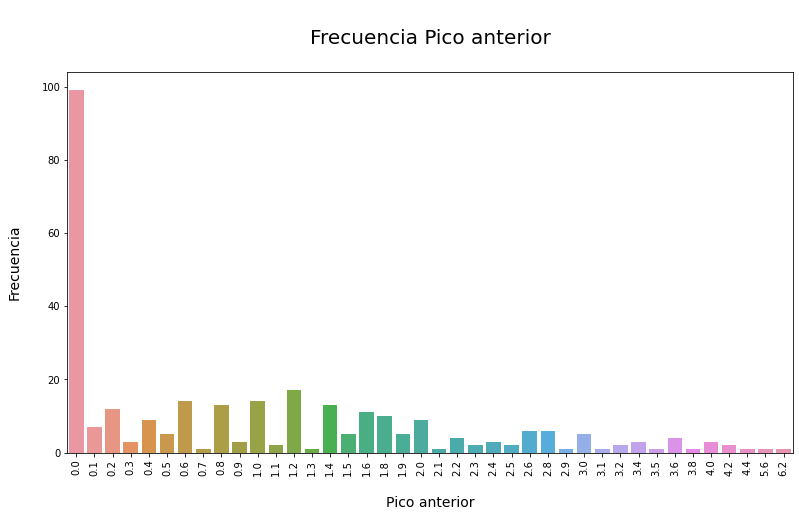

In [284]:
fig, ax = plt.subplots(figsize = (13,7))
plt.title("\nFrecuencia Pico anterior\n", fontsize = 20)
plt.xticks(rotation = 90)
sns.countplot(df2['Pico_anterior'])
plt.ylabel("Frecuencia\n", fontsize = 14)
plt.xlabel("\nPico anterior", fontsize = 14)

En esta gráfica podemos ver que por lo general, cuando tienen un ataque no hay picos anteriores

- Gráfica KDE

Text(0.5, 1.0, '\nGráfica KDE del colesterol\n')

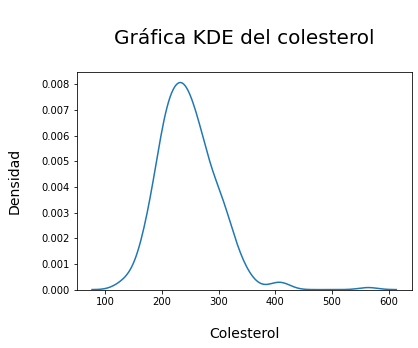

In [285]:
sns.kdeplot(df2.query('Colesterol > 100').Colesterol)
plt.ylabel("Densidad\n", fontsize = 14)
plt.xlabel("\nColesterol", fontsize = 14)
plt.title("\nGráfica KDE del colesterol\n", fontsize = 20)

La densidad parece estar alrededor del 200. La mayoría de los observados tienen colesteror alrededor de 200

- Gráfica de distancia

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '\nGráfica de distancia del colesterol\n')

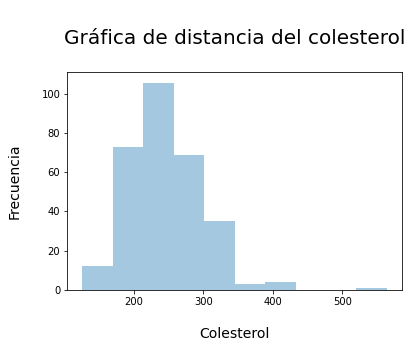

In [286]:
sns.distplot(df2['Colesterol'], bins=10, kde=False)
plt.ylabel("Frecuencia\n", fontsize = 14)
plt.xlabel("\nColesterol", fontsize = 14)
plt.title("\nGráfica de distancia del colesterol\n", fontsize = 20)

Como vemos, es lo mismo que el histograma de matplotlib

- Gráfica joinplot

Text(0.5, 1.0, '\nGráfica joinplot de dispersión presión reposo VS frecuencia cardíaca máxima\n\n\n')

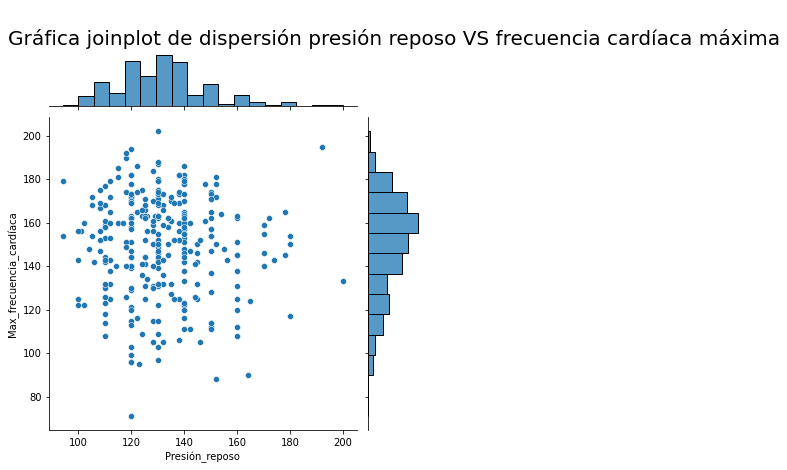

In [287]:
sns.jointplot(x = 'Presión_reposo', y = 'Max_frecuencia_cardíaca', data = df2[df2['Presión_reposo']>0])
plt.title("\nGráfica joinplot de dispersión presión reposo VS frecuencia cardíaca máxima\n\n\n", fontsize = 20)

Como vemos, la gráfica de dispersión no cambia con respecto a la de matplotlib, pero en esta ocación, gracias a los hitogramas, podemos ver que hay mayor frecuencia entre los valores 120 y 160 para ambas variables

- Gráfica joinplot hexagonal

Text(0.5, 1.0, '\nGráfica joinplot hexagonal presión reposo VS frecuencia cardíaca máxima\n\n\n')

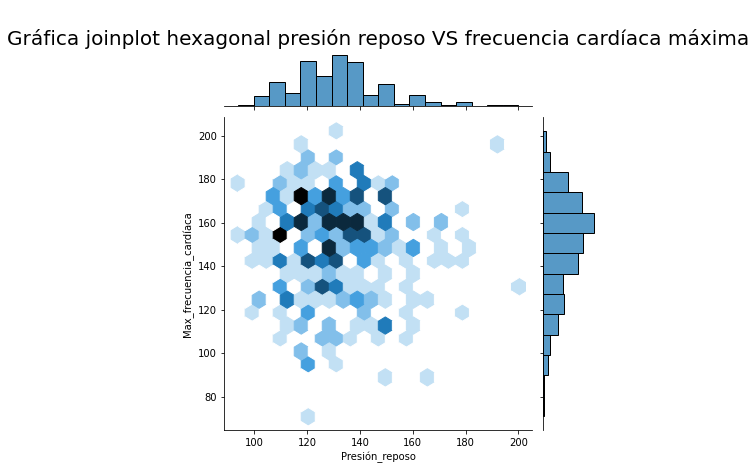

In [288]:
sns.jointplot(x = 'Presión_reposo', y = 'Max_frecuencia_cardíaca', data = df2[df2['Presión_reposo'] > 5], kind='hex', 
              gridsize=20)
plt.title("\nGráfica joinplot hexagonal presión reposo VS frecuencia cardíaca máxima\n\n\n", fontsize = 20)

Aquí pasa lo mismo que con la gráfica de dispersión y la hexagonal de matplotlib. Es mucho más fácil ver las frecuencias de los datos en cuestión. Mientras más oscuro estén los exágonos, más frecuencia hay

## Box plots

- Gráfica de caja

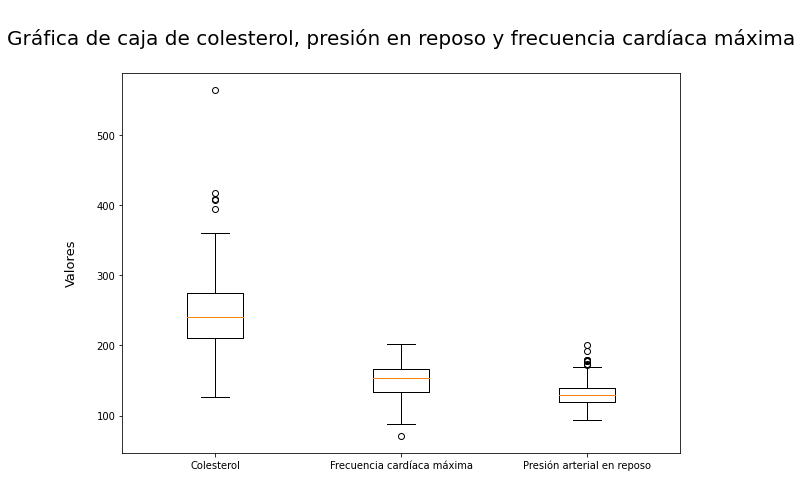

In [289]:
fig, ax = plt.subplots(figsize = (10, 7))
# Fuente de apoyo: https://www.delftstack.com/es/howto/matplotlib/matplotlib-boxplot-python/
plt.boxplot(x = (df2['Colesterol'], df2['Max_frecuencia_cardíaca'], df2['Presión_reposo']), labels = ("Colesterol", "Frecuencia cardíaca máxima", "Presión arterial en reposo"))
plt.title("\nGráfica de caja de colesterol, presión en reposo y frecuencia cardíaca máxima\n", fontsize = 20)
plt.ylabel("Valores\n", fontsize = 13)
plt.show()

La mayoría de los datos del colesterol están alrededor del 250, mientras que los de la frecuencia cardíaca máxima y los de la presión en reposo están alrededor del 150.

No se ven muchos datos atípicos, así que podemos "confiar" en los datos 

- Gráfica de violín

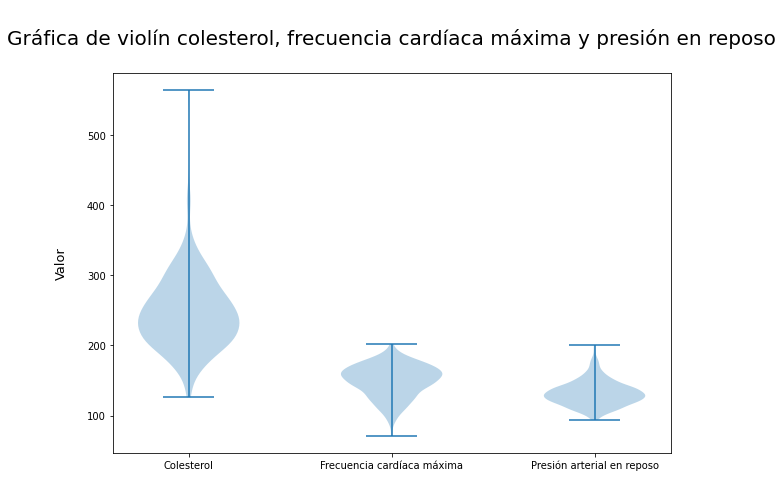

In [290]:
fig, ax = plt.subplots(figsize = (10, 7))
# Fuente de apoyo: https://pharos.sh/trama-de-violin-de-matplotlib-tutorial-y-ejemplos/
plt.violinplot([df2['Colesterol'], df2['Max_frecuencia_cardíaca'], df2['Presión_reposo']])
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Colesterol", "Frecuencia cardíaca máxima", "Presión arterial en reposo"])
plt.title("\nGráfica de violín colesterol, frecuencia cardíaca máxima y presión en reposo\n", fontsize = 20)
plt.ylabel("Valor\n", fontsize = 13)
plt.show()

Como vemos, esta gráfica se parece mucho a la de cajas, pero no muestra datos atípicos. Mientras más gordo esté el violín, mayor es la frecuencia

## Matriz de gráficas

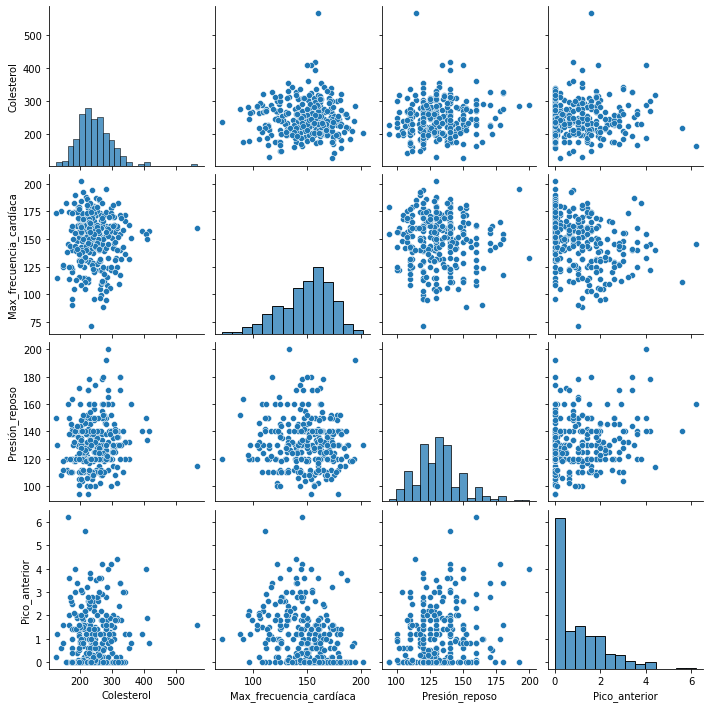

In [291]:
sns.pairplot(df2[['Colesterol', 'Max_frecuencia_cardíaca', 'Presión_reposo', 'Pico_anterior']])

Como vemos en la gráfica, no parece haber mucha relación entre las variables analizadas. Los datos en las gráficas de dispersión parece que están muy dispersos y sin tendencia visible

## Gráficas multivariantes

- Gráfica de dispersión

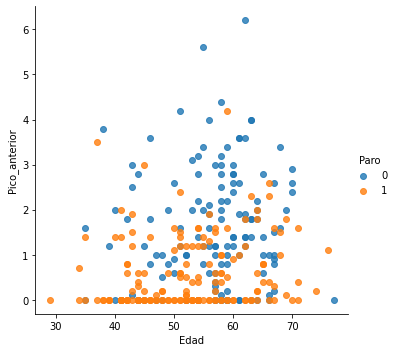

In [292]:
sns.lmplot(x = 'Edad', y = 'Pico_anterior', hue = 'Paro', 
           data = df2.loc[df2['Paro'].isin([0, 1])], 
           fit_reg=False)

Primero:
- 0: Menor probabilidad de ataque
- 1: Mayor probabilidad de ataque

A simple vista, parece que la edad no influye tanto en la probabilidad de sufrir un ataque, pero si vemos detenidamente, después de los 65 años hay más puntos naranja que azulos, es decir, después de los 65 hay más personas con mayor probabilidad de sufrir un ataque, por lo que, después de los 65, es más probable sufrir un ataque

- Histograma

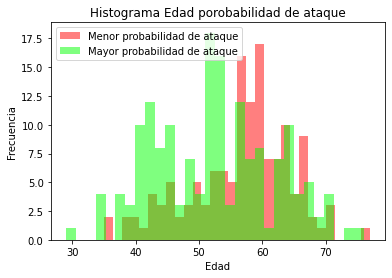

In [293]:
m = plt.hist(df2[df2["Paro"] == 0].Edad, bins = 30, fc = (1,0,0,0.5), label = "Menor probabilidad de ataque")
b = plt.hist(df2[df2["Paro"] == 1].Edad, bins = 30, fc = (0,1,0,0.5), label = "Mayor probabilidad de ataque")
plt.legend()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma Edad porobabilidad de ataque")
plt.show()

Aquí se ve algo similar que en la gráfica anterior, pero esta vez es muy claro que dentre los 40 y los 45 años, parece haber una mayor probabilidad de sufrir un ataque. Se ve claramente que la gráfica verde sobrepasa a la rosa

- Gráfica de caja

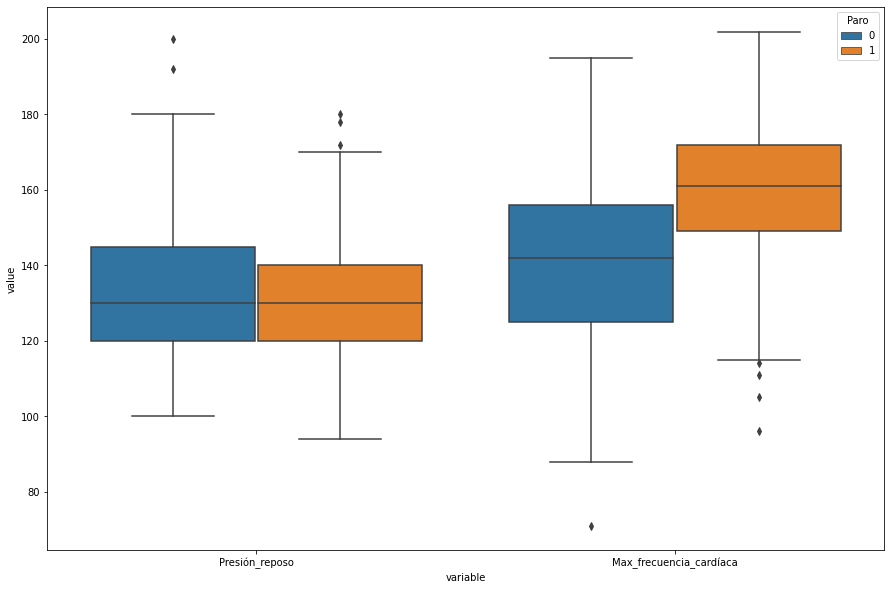

In [294]:
mdata = pd.melt(df2, id_vars = "Paro", value_vars = ['Presión_reposo', 'Max_frecuencia_cardíaca'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue = "Paro", data= mdata)
plt.show()

De la gráfica, podemos decir que la presión arterial en reposo no es un factor determinante para determinar la probabilidad de sufrir un ataque porque las cajas están muy parecidas.

En cambio, la frecuencia cardíaca máxima sí parece tener influencia. En la gráfica vemos que la caja de mayor probabilidad de ataque está más arriba que la de menor probabilidad, entonces, mientras mayor sea la frecuancia cardíaca máxima, más probable es sufrir un ataque

- Mapa de correlación

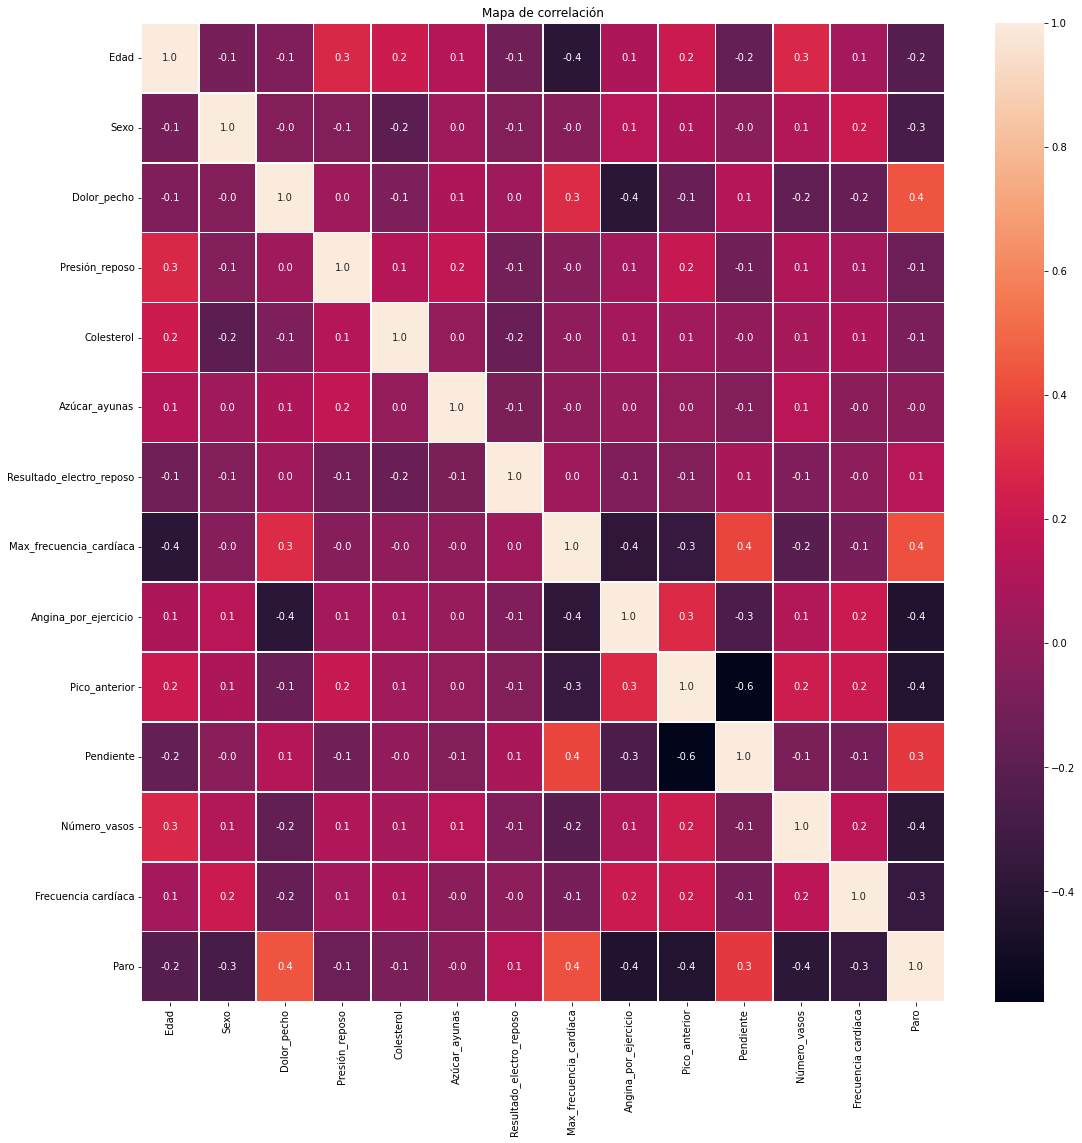

In [295]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df2.corr(), annot = True, linewidths = 0.5, fmt = ".1f", ax = ax)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('Mapa de correlación')
plt.show()

Como vemos, las variables parecen no estar relacionadas. Su correlación es muy baja